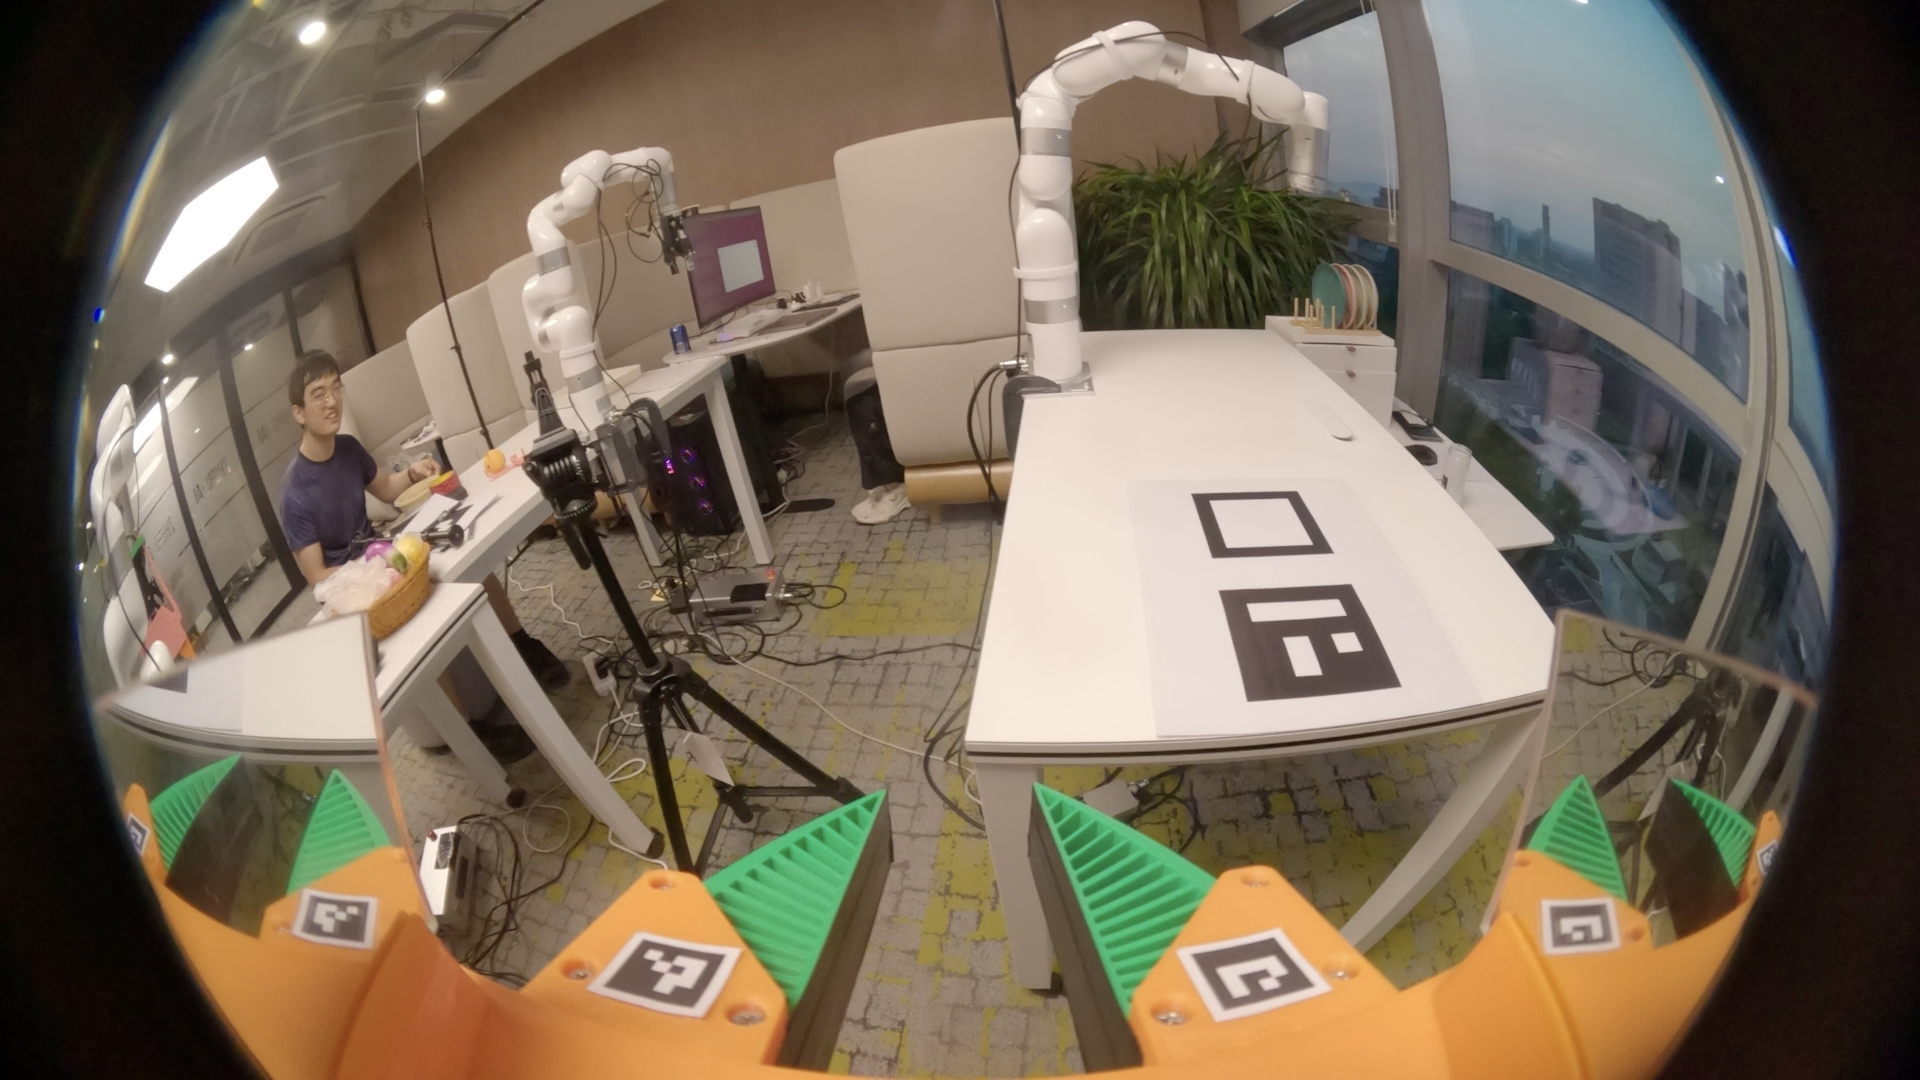

In [44]:
from PIL import Image

import IPython.display as display

# image_path = "/Users/Max/Desktop/screenshot/our_image.png"
image_path = "/Users/Max/Desktop/screenshot/gripper_test_image.png"

# Open the image using PIL
image = Image.open(image_path)

# Display the image in the notebook
display.display(image)

In [45]:
import numpy as np
import cv2

def draw_mask(image, pts: list, mask_color, half_opacity=True):
    image_array = np.array(image)
    mask = np.zeros
    mask = np.zeros(image_array.shape[:2], dtype=np.uint8)
    pts_array = np.array(pts, dtype=np.int32)
    cv2.fillPoly(mask, [pts_array], 255)
    try:
        masked_image_array = np.where(mask[:, :, None], image_array // 2 + mask_color[None, None, :] // 2, image_array)
    except:
        masked_image_array = np.where(mask[:, :, None], image_array // 2 + mask_color[None, None, :-1] // 2, image_array)
    return Image.fromarray(masked_image_array)

finger points: [[700, 750], [1220, 750], [1820, 1080], [100, 1080]]


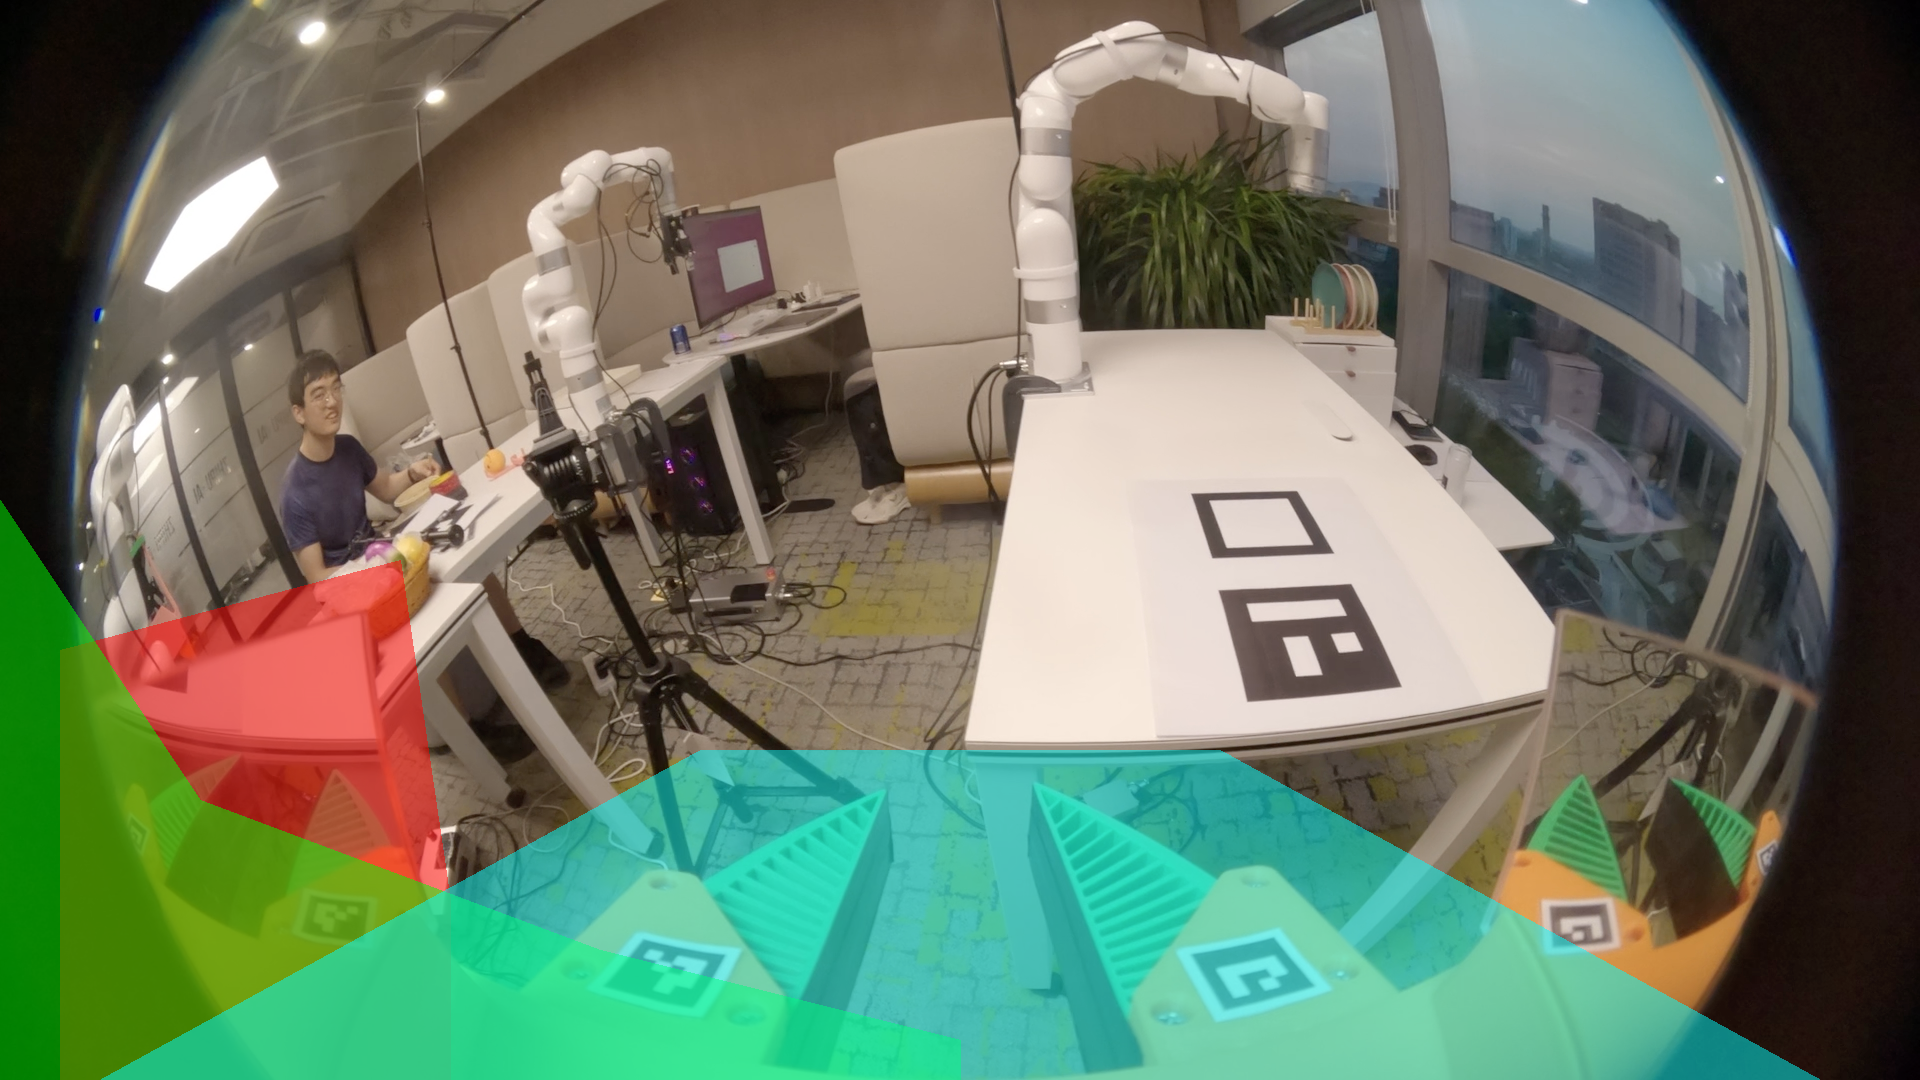

In [46]:
# o-----> x
# |
# |
# v y

mirror_left_pts = [
  # [540, 1700], # middle corner
    [450, 900], # right corner
    [400, 560], # top corner
    [60, 650], # left-up corner
    [60, 1080], # left-bottom corner
    [450, 1080]  # right-bottom corner
]

gripper_left_pts = [
  [960, 1040], # top-right
  [600, 950],
  [200, 800],
  [0, 500], # top-left
  [0, 1080], # bottom-left
  [960, 1080] # bottom-right
]

# points for finger mask
resolution = [1920, 1080]
width  = 1920
height = 1080

horizontal_mir = lambda x : width - x
vertical_mir  = lambda y : height - y

left_top    = [700, 750]
left_bottom = [100, height]

right_top = [
    horizontal_mir(left_top[0]),
    left_top[1]
]
right_bottom = [
    horizontal_mir(left_bottom[0]),
    left_bottom[1]
]

finger_pts = [
    [left_top[0],     left_top[1]    ],
    [right_top[0],    right_top[1]   ],
    [right_bottom[0], right_bottom[1]],
    [left_bottom[0],  left_bottom[1] ]
]
print(f'finger points: {finger_pts}')

mirror_mask_color  = np.array([255, 0,   0,   255], dtype=np.uint8)
gripper_mask_color = np.array([0,   255, 0,   255], dtype=np.uint8)
finger_mask_color  = np.array([0,   255, 255, 255], dtype=np.uint8)

mask_image = draw_mask(image, mirror_left_pts, mirror_mask_color, half_opacity=True)
mask_image = draw_mask(mask_image, gripper_left_pts, gripper_mask_color, half_opacity=True)
mask_image = draw_mask(mask_image, finger_pts, finger_mask_color, half_opacity=True)

mask_image

# Tag gen test

In [48]:
import subprocess

# 定义命令的各个部分
command = [
    "python", "scripts/gen_image_mask.py",
    "-c", "umi/asset/gopro_11_hero_maxlens_2_0_mask.json",
    "-i", ".",
    "-h", "1080",
    "-w", "1920"
]

# 使用 subprocess.run 执行命令
subprocess.run(command)

sys.path: ['/Users/max/Desktop/universal_manipulation_interface/scripts', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/max/Desktop/universal_manipulation_interface']


Traceback (most recent call last):
  File "/Users/max/Desktop/universal_manipulation_interface/scripts/gen_image_mask.py", line 16, in <module>
    from umi.common.cv_util import get_gripper_with_finger_mask, get_mirror_mask
ImportError: cannot import name 'get_mirror_mask' from 'umi.common.cv_util' (/Users/max/Desktop/universal_manipulation_interface/umi/common/cv_util.py)


CompletedProcess(args=['python', 'scripts/gen_image_mask.py', '-c', 'umi/asset/gopro_11_hero_maxlens_2_0_mask.json', '-i', '.', '-h', '1080', '-w', '1920'], returncode=1)